In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

# https://gymnasium.farama.org/environments/classic_control/pendulum/#pendulum

ENV_NAME = 'Pendulum-v1'
env = gym.make(ENV_NAME, g=9.81, render_mode="rgb_array")
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<PendulumEnv<Pendulum-v1>>>>>

In [2]:
env.observation_space # 25 taxi positions, 5 possible locations of the passenger, 4 destination location

Box([-1. -1. -8.], [1. 1. 8.], (3,), float32)

In [3]:
env.action_space # Torque

Box(-2.0, 2.0, (1,), float32)

In [4]:
observation, info = env.reset()
observation, info

(array([ 0.9141038 , -0.4054802 ,  0.11289901], dtype=float32), {})

In [5]:
action = env.action_space.sample() # choose a random action
action

array([0.22960894], dtype=float32)

In [6]:
observation, reward, terminated, truncated, info = env.step(action)
observation, reward, terminated, truncated, info

(array([ 0.9110166 , -0.4123697 , -0.15099171], dtype=float32),
 -0.17563700597764878,
 False,
 False,
 {})

In [7]:
env_screen = env.render() # numpy array

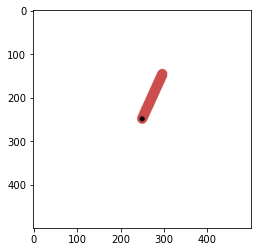

In [8]:
plt.imshow(env_screen)

In [4]:
###################################
# play Frozen Lake with a policy
###################################

import gym
import numpy as np

ENV_NAME = 'Pendulum-v1'
env = gym.make(ENV_NAME , render_mode="rgb_array")
observation, _ = env.reset()
NUM_EPISODES = 1
env_screens = []

rewards = np.zeros(NUM_EPISODES)
for i in range(NUM_EPISODES):
    terminated = False
    truncated = False
    observation, _ = env.reset()
    total_reward = 0.0
    while not terminated and not truncated:
        action = env.action_space.sample() 
        observation, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        env_screens.append(env.render())
    rewards[i] = total_reward
rewards.mean()

C:\Users\t\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


-1169.9241015137736

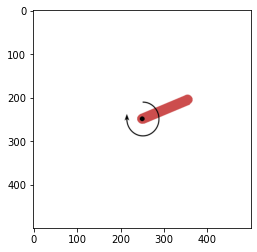

In [5]:
####################################################
# create an animation
#===================================================
import gym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


fig, ax = plt.subplots()
im = ax.imshow(env_screens[0])

def update(i):
    im.set_data(env_screens[i])
    return (im)

animation = FuncAnimation(fig=fig, func=update, frames=len(env_screens), interval=100)
plt.show()

# display the animation in the notebook
HTML(animation.to_jshtml())
